
# 1. Dataset

Load datasets in scikit-learn: https://scikit-learn.org/stable/datasets

matplotlib: https://matplotlib.org/tutorials/index.html

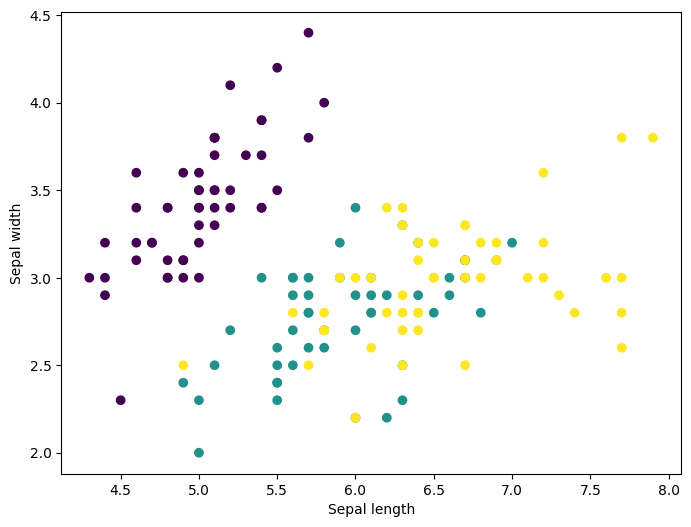

In [4]:
import matplotlib.pyplot as plt
from sklearn import datasets

# import some data
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
y = iris.target

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

plt.figure(1, figsize=(8, 6))
plt.clf()

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.show() # You can comment it after using a magic command "%matplotlib inline"

# 2. Numpy

Document website https://numpy.org/doc/stable/

In [5]:
import numpy as np
a = np.arange(15).reshape(3, 5)
print("a:\n", a)
print("The dimensions of the array:", a.shape)
print("The number of axes:", a.ndim)
print("The type of the elements in the array:", a.dtype.name)
print("Type of a:", type(a))
b = np.array([6, 7, 8]) 
print("Type of b:", type(b))

a:
 [[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]
The dimensions of the array: (3, 5)
The number of axes: 2
The type of the elements in the array: int64
Type of a: <class 'numpy.ndarray'>
Type of b: <class 'numpy.ndarray'>


# 3. Pandas

## 3.1 Read File
```python
pandas.read_csv(filepath_or_buffer, sep=',', header='infer', skiprows=None, skipfooter=0, nrows=None, iterator=False, chunksize=None, encoding=None)
```

Parameters:
- filepath_or_buffer: str, path object or file-like object  
    Any valid string path is acceptable. The string could be a URL. Valid URL schemes include http, ftp, s3, gs, and file.


- sep: str, default ','  
    Delimiter to use.


- header: int, list of int, default ‘infer’  
   Row number(s) to use as the column names, and the start of the data.


- skiprows: list-like, int or callable, optional  
   Line numbers to skip (0-indexed) or number of lines to skip (int) at the start of the file.


- skipfooter: int, default 0  
   Number of lines at bottom of file to skip .


- nrows:int, optional  
   Number of rows of file to read. Useful for reading pieces of large files.


- iterator: bool, default False  
   Return TextFileReader object for iteration or getting chunks with get_chunk().


- chunksize: int, optional  
   Return TextFileReader object for iteration. See the IO Tools docs for more information on iterator and chunksize.


- encoding: str, optional  
   Encoding to use for UTF when reading/writing (ex. ‘utf-8’). List of Python standard encodings.


In [6]:
import pandas as pd
df = pd.read_csv('./iris.data', sep=',', header=None)
df

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


## 3.2 Process Data

### convert the dataframe to numpy array

In [7]:
import numpy as np
da = np.array(df) # convert df to np array
print(da.shape)
print(da[0:2])   

(150, 5)
[[5.1 3.5 1.4 0.2 'Iris-setosa']
 [4.9 3.0 1.4 0.2 'Iris-setosa']]


### map the target name to index

In [8]:
target_map = {"Iris-setosa": 0, "Iris-versicolor": 1, "Iris-virginica": 2}
X = np.empty((da.shape[0], 4), dtype=np.float64)
y = np.empty((da.shape[0],), dtype=np.int32)
for i in range(da.shape[0]):
    X[i] = da[i, 0:4]
    y[i] = target_map[da[i, 4]]
print(y.shape)

(150,)


### Normalize the last 2 feature values
### tip1: use (X[:, 2:]-*mean*)/*std* to compute normalized value
### tip2: use np.mean() to compute *mean*, and np.std to compute *std*

In [9]:
mean = np.mean(X[:, 2:], axis=0)
std = np.std(X[:, 2:], axis=0)
X_draw = (X[:, 2:]-mean)/std
print(X_draw)

[[-1.34022653e+00 -1.31544430e+00]
 [-1.34022653e+00 -1.31544430e+00]
 [-1.39706395e+00 -1.31544430e+00]
 [-1.28338910e+00 -1.31544430e+00]
 [-1.34022653e+00 -1.31544430e+00]
 [-1.16971425e+00 -1.05217993e+00]
 [-1.34022653e+00 -1.18381211e+00]
 [-1.28338910e+00 -1.31544430e+00]
 [-1.34022653e+00 -1.31544430e+00]
 [-1.28338910e+00 -1.44707648e+00]
 [-1.28338910e+00 -1.31544430e+00]
 [-1.22655167e+00 -1.31544430e+00]
 [-1.34022653e+00 -1.44707648e+00]
 [-1.51073881e+00 -1.44707648e+00]
 [-1.45390138e+00 -1.31544430e+00]
 [-1.28338910e+00 -1.05217993e+00]
 [-1.39706395e+00 -1.05217993e+00]
 [-1.34022653e+00 -1.18381211e+00]
 [-1.16971425e+00 -1.18381211e+00]
 [-1.28338910e+00 -1.18381211e+00]
 [-1.16971425e+00 -1.31544430e+00]
 [-1.28338910e+00 -1.05217993e+00]
 [-1.56757623e+00 -1.31544430e+00]
 [-1.16971425e+00 -9.20547742e-01]
 [-1.05603939e+00 -1.31544430e+00]
 [-1.22655167e+00 -1.31544430e+00]
 [-1.22655167e+00 -1.05217993e+00]
 [-1.28338910e+00 -1.31544430e+00]
 [-1.34022653e+00 -1

### Draw a scatter plot based on the normalized feature values

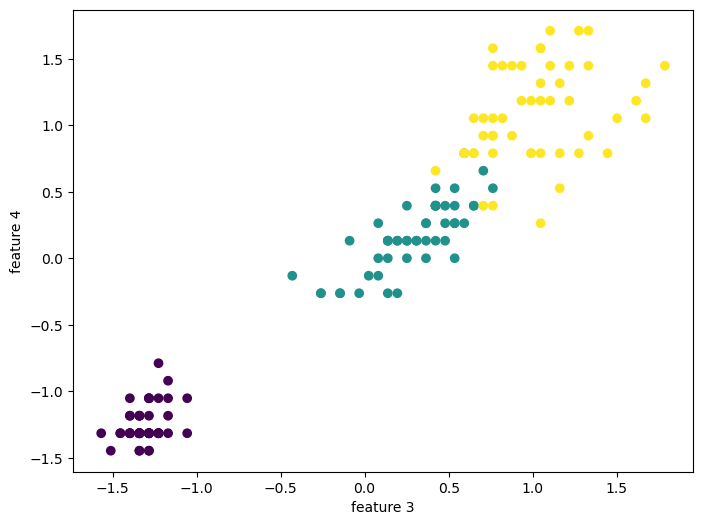

In [7]:
x_min, x_max = X_draw[:, 0].min() - .1, X_draw[:, 0].max() + .1
y_min, y_max = X_draw[:, 1].min() - .1, X_draw[:, 1].max() + .1

plt.figure(1, figsize=(8, 6))
plt.clf()

# Plot the training points
plt.scatter(X_draw[:, 0], X_draw[:, 1], c=y)
plt.xlabel('feature 3')
plt.ylabel('feature 4')

plt.show()